In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daigt-one-place-all-data/concatenated.csv


In [5]:
train = pd.read_csv("/kaggle/input/daigt-one-place-all-data/concatenated.csv")

In [6]:
train

,id,prompt_id,text,generated,model,kaggle_repo
0,d429f032,0,Advantages of Limiting Car Usage \n\nLimiting ...,1,gpt-3.5-turbo,1
1,1ce279be,0,Advantages of Limiting Car Usage\n\nLimiting c...,1,gpt-3.5-turbo,1
2,c9595213,0,Limiting car usage has numerous advantages tha...,1,gpt-3.5-turbo,1
3,f2266d87,0,The passages provided discuss the advantages o...,1,gpt-3.5-turbo,1
4,eeace4bd,0,Title: The Advantages of Limiting Car Usage\n\...,1,gpt-3.5-turbo,1
...,...,...,...,...,...,...
54686,df8bf6e6-eca4-417c-bce2-b3b90d782d93,-1,I believe using cellphones in class for educat...,0,human,9
54687,502c11ac-7d0a-4b11-8572-5f7317364bc7,-1,"Working alone, students do not have to argue w...",0,human,9
54688,993f33f3-0cfa-4b5a-b382-bdf7f82e2666,-1,"""A problem is a chance for you to do your best...",0,human,9
54689,0f9f0196-4828-4122-b0cb-aea2373066fb,-1,Many people disagree with Albert Schweitzer's ...,0,human,9


In [7]:
train.drop(columns =['id','prompt_id'],inplace = True)

In [8]:
train.dropna(axis = 0 , inplace = True, ignore_index = True)

In [9]:
train = train.sample(frac = 0.4 ,ignore_index= True, random_state = 47)

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['model']= label_encoder.fit_transform(train['model'])

In [11]:
# Importing libraries
import re
import string
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords') 
stop_words = set(stopwords.words('english')) 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def remove_stop_words(sentence): 
  # Split the sentence into individual words 
  words = sentence.split() 
  filtered_words = []
  # Use a list comprehension to remove stop words 
  filtered_words = [word for word in words if word not in stop_words] 
  
  # Join the filtered words back into a sentence 
  return ' '.join(filtered_words)
def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)
def remove_punct(data):
    return data.translate(str.maketrans('','',string.punctuation))
def remove_url(data):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',data)
def stem_sentence(sentence):
    tokens = word_tokenize(sentence)
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)


In [13]:
def preprocess(data):
    data['text'] = data['text'].str.lower()
    data['text'] = data['text'].apply(remove_url)
    data['text'] = data['text'].apply(remove_html)
    data['text'] = data['text'].apply(remove_punct)
    data['text'] = data['text'].apply(remove_stop_words)
    data['text'] = data['text'].apply(stem_sentence)
    return data

In [14]:
data = train.copy()

In [15]:
data = preprocess(data)

In [16]:
# data.to_csv("daigt_10k_4.csv")

In [17]:
# df_train = pd.read_csv("/kaggle/working/daigt_10k_4.csv")

In [18]:
 # 1 = ai , 0 = human 

In [19]:
y = data['generated']

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [22]:
ai_gen = wc.generate(data[y == 1]['text'].str.cat(sep=" "))

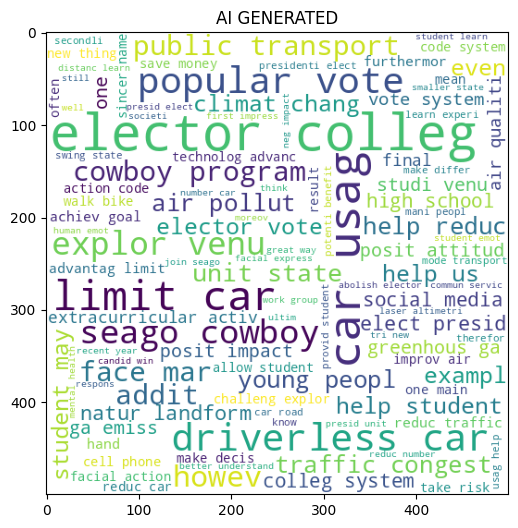

In [23]:
plt.figure(figsize=(15,6))
plt.title("AI GENERATED")
plt.imshow(ai_gen)

In [24]:
hum_gen = wc.generate(data[y == 0]['text'].str.cat(sep=" "))

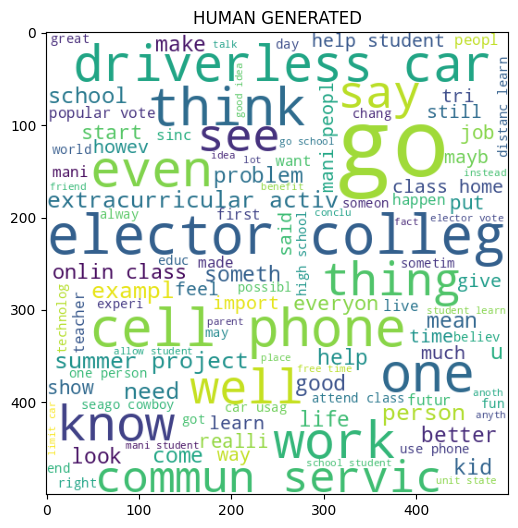

In [25]:
plt.figure(figsize=(15,6))
plt.title("HUMAN GENERATED")
plt.imshow(hum_gen)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (1,2),max_features= 5000)

In [27]:
total = pd.DataFrame(tfidf.fit_transform(data['text']).toarray())

In [28]:
# import pickle

In [29]:
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(total,y,test_size=0.2,random_state=2)

In [33]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostRegressor

In [46]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [47]:
clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
    'NB': mnb, 
    'BNB': bnb,

#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
 }

In [48]:
from sklearn.model_selection import cross_val_score
def train_classifier(clf,X_train,y_train,X_test,y_test,total , y):
    csr_val = cross_val_score(clf, total, y, cv=3,scoring= "f1")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    return recall,precision ,f1score,accuracy, csr_val.mean()

In [49]:
for name,clf in clfs.items():
    
    recall,precision,f1score,accuracy,csr_val = train_classifier(clf, X_train,y_train,X_test,y_test,total , y)
    
    print("For ",name)
    print("recall - ",recall)
    print("Precision - ",precision)
    print("f1_score - ",f1score)
    print("accuracy - ",accuracy)
    print("cross_val - ",csr_val)
    print("************************")


For  NB
recall -  0.9132169576059851
Precision -  0.9786210582576162
f1_score -  0.9447884416924665
accuracy -  0.9510968921389397
cross_val -  0.9440875646339233
************************
For  BNB
recall -  0.8992518703241895
Precision -  0.985784581738655
f1_score -  0.9405320813771518
accuracy -  0.9478976234003657
cross_val -  0.9396381640608423
************************


array([0, 1])

In [ ]:
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score
# from keras.models import Sequential
# from keras.layers import Dense


# # Splitting the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(total, y, test_size=0.2, random_state=42)

# # Define a simple neural network with three layers
# model = Sequential()

# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=16, activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))  # For binary classification

# # Compile the model using F1 score as the scoring metric
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# # Predict on the test set
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# # Calculate F1 score on test set
# f1 = f1_score(y_test, y_pred)
# print("F1 score:", f1)
